# Youtube Comment Sentiment Analysis

## Problem Definiton

To analyze the comments of a youtube video using vader-lexion sentimental anaylsis in the nltk package by NLP.

# 1. Importing necessary libraries 

In [1]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from string import punctuation
import re

#  2. Data Collection

In [2]:
from youtube_comment_scraper_python import *
import pandas as pd

link = input("Youtube links: ")
saved = input("Output name: ")
saved = "D:/PG/SEM IV/" + saved

Starting DataKund...
Youtube links: https://www.youtube.com/watch?v=3u7MQz1EyPY&t=862s
Output name: comm2


In [3]:
youtube.open(link)

response = youtube.video_comments()
all_data = []
for i in range(0, 3): # It will scroll 10 times
    response = youtube.video_comments()
    data = response['body']
    all_data.extend(data)
df = pd.DataFrame(data)
print(df)

Progress:  66%|█████████████████████████████████████████████                       | 132.6/200 [01:07<01:13,  1.09s/it]
Progress:  69%|██████████████████████████████████████████████▉                     | 138.0/200 [01:33<03:16,  3.16s/it]
Progress:  77%|████████████████████████████████████████████████████▏               | 153.4/200 [01:41<01:02,  1.34s/it]
Progress:  84%|█████████████████████████████████████████████████████████▍          | 168.8/200 [01:43<00:23,  1.35it/s]
Progress:  92%|██████████████████████████████████████████████████▋    | 184.20000000000002/200 [01:52<00:10,  1.54it/s]
Progress: 100%|██████████████████████████████████████████████████████▉| 199.60000000000002/200 [01:54<00:00,  2.18it/s]
Progress: 225.20000000000002it [01:58,  3.14it/s]                                                                      
Progress: 226.8it [02:02,  2.43it/s]             ▉                                 | 102.6/200 [00:36<00:24,  3.90it/s]
Progress: 228.4it [02:04,  2.17it/s]████

                                              Comment Likes  \
0   Got a question on the topic? Please share it i...    58   
1   Thanks for the course! This is the best Power ...    66   
2   Hi Edureka! This is a great tutorial course fo...     0   
3   Very Good tutorial on Power BI. Could you pls ...     0   
4            Hello edureka this is a fantastic course     1   
5   a detailed and excellent piece of work by Edur...     6   
6   Hello,The video is awesome and it would be muc...     1   
7   Great job done....I have never imagined so muc...     3   
8   Hi edureka...Thank you so much for giving the ...    21   
9   This is amazing, so we’ll explained like alway...     2   
10  Hi Edureka! This is a great tutorial course fo...     0   
11  Great job Edureka! Well explained in theory as...     0   
12  Thank you Edureka.This is so far the best Powe...     0   
13  Thank you Edureka.This is so far the best Powe...     4   
14  Hi edureka! This is an amazing video that you ...  



Progress: 498.5999999999999it [05:00,  1.21s/it] 

Progress: 322.6it [02:26,  2.21it/s]
Progress: 565.9999999999999it [05:02,  1.87it/s]

Progress: 443.39999999999986it [03:40,  2.01it/s]



Progress: 100%|████████████████████████████████████████████████████████████████████| 200.0/200 [01:22<00:00,  2.43it/s]


In [4]:
df.to_csv(saved)

In [7]:
path_txt = saved + ".txt"
file = open(path_txt, 'w')
file.write(str(df))
file.close()

In [8]:
print(df.columns)

Index(['Comment', 'Likes', 'Time', 'UserLink', 'user'], dtype='object')


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [10]:
path = saved + ".csv"
print(path)

D:/PG/SEM IV/comm2.csv


# 3. Import the data for analysis

In [12]:
# reading the csv file
# data = pd.read_csv("D:/PG/SEM IV/comm.csv")
data =df

# 4. Data Analysis

In [13]:
# print the column names of the dataset
print(data.columns)

# print top of the data
print(data.head(10))

Index(['Comment', 'Likes', 'Time', 'UserLink', 'user'], dtype='object')
                                             Comment Likes  \
0  Got a question on the topic? Please share it i...    58   
1  Thanks for the course! This is the best Power ...    66   
2  Hi Edureka! This is a great tutorial course fo...     0   
3  Very Good tutorial on Power BI. Could you pls ...     0   
4           Hello edureka this is a fantastic course     1   
5  a detailed and excellent piece of work by Edur...     6   
6  Hello,The video is awesome and it would be muc...     1   
7  Great job done....I have never imagined so muc...     3   
8  Hi edureka...Thank you so much for giving the ...    21   
9  This is amazing, so we’ll explained like alway...     2   

                    Time                                           UserLink  \
0   3 years ago (edited)  https://www.youtube.com/channel/UCkw4JCwteGrDH...   
1            2 years ago                                                NaN   
2       

In [14]:
data = data.drop('UserLink', axis =1)
data = data.drop('user', axis =1)
print(data.head())

                                             Comment Likes  \
0  Got a question on the topic? Please share it i...    58   
1  Thanks for the course! This is the best Power ...    66   
2  Hi Edureka! This is a great tutorial course fo...     0   
3  Very Good tutorial on Power BI. Could you pls ...     0   
4           Hello edureka this is a fantastic course     1   

                   Time  
0  3 years ago (edited)  
1           2 years ago  
2            3 days ago  
3            6 days ago  
4            2 days ago  


In [15]:
data.count()

Comment    20
Likes      20
Time       20
dtype: int64

In [16]:
data["comment_text"] = data["Comment"].copy()

In [17]:
print(data.columns)

Index(['Comment', 'Likes', 'Time', 'comment_text'], dtype='object')


In [18]:
print(data.head(5))

                                             Comment Likes  \
0  Got a question on the topic? Please share it i...    58   
1  Thanks for the course! This is the best Power ...    66   
2  Hi Edureka! This is a great tutorial course fo...     0   
3  Very Good tutorial on Power BI. Could you pls ...     0   
4           Hello edureka this is a fantastic course     1   

                   Time                                       comment_text  
0  3 years ago (edited)  Got a question on the topic? Please share it i...  
1           2 years ago  Thanks for the course! This is the best Power ...  
2            3 days ago  Hi Edureka! This is a great tutorial course fo...  
3            6 days ago  Very Good tutorial on Power BI. Could you pls ...  
4            2 days ago           Hello edureka this is a fantastic course  


# 5. Data Preprocessing

In [19]:
stop_words = stopwords.words('english')

In [20]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    

    return text


In [21]:
for i in range(0,len(data)):
#     data["comment"] = [text_processing(i)["comment_text"] for i in data['comment_text']]
    data["comment_text"][i] = text_processing(data['comment_text'][i])

In [22]:
print(data.head(5))

                                             Comment Likes  \
0  Got a question on the topic? Please share it i...    58   
1  Thanks for the course! This is the best Power ...    66   
2  Hi Edureka! This is a great tutorial course fo...     0   
3  Very Good tutorial on Power BI. Could you pls ...     0   
4           Hello edureka this is a fantastic course     1   

                   Time                                       comment_text  
0  3 years ago (edited)  got question topic please share comment sectio...  
1           2 years ago  thanks course best power bi course ive come ac...  
2            3 days ago  hi edureka great tutorial course power bi begi...  
3            6 days ago  good tutorial power bi could pls share dataset...  
4            2 days ago                     hello edureka fantastic course  


# 6. Sentiment Analysis

In [23]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data['comment_text']]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data['comment_text']]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data['comment_text']]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data['comment_text']]
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.04:
        sentiment.append('Positive')
        
    elif i <= -0.04:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Comment,Likes,Time,comment_text,Positive,Negative,Neutral,Compound,Sentiment
0,Got a question on the topic? Please share it i...,58,3 years ago (edited),got question topic please share comment sectio...,0.113,0.011,0.876,0.9382,Positive
1,Thanks for the course! This is the best Power ...,66,2 years ago,thanks course best power bi course ive come ac...,0.463,0.000,0.537,0.8591,Positive
2,Hi Edureka! This is a great tutorial course fo...,0,3 days ago,hi edureka great tutorial course power bi begi...,0.505,0.000,0.495,0.9231,Positive
3,Very Good tutorial on Power BI. Could you pls ...,0,6 days ago,good tutorial power bi could pls share dataset...,0.560,0.000,0.440,0.7845,Positive
4,Hello edureka this is a fantastic course,1,2 days ago,hello edureka fantastic course,0.545,0.000,0.455,0.5574,Positive


In [24]:
data.columns

Index(['Comment', 'Likes', 'Time', 'comment_text', 'Positive', 'Negative',
       'Neutral', 'Compound', 'Sentiment'],
      dtype='object')

# 7. Analysing the output

In [25]:
count_df = data['Sentiment'].value_counts()
count_index = count_df.index
count_values = count_df.values
print(count_index, count_values)

Index(['Positive'], dtype='object') [20]


In [26]:
count_list = count_df.values.tolist()
count_list

[20]

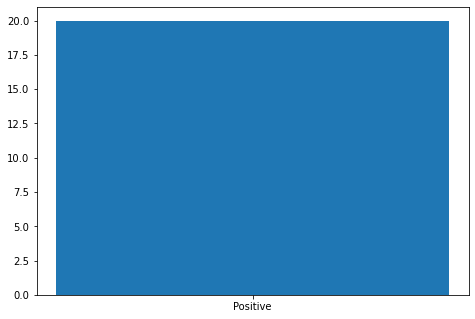

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(count_index,count_values)
plt.show()